# Regression Model Plot and Evaluation

This code loads trained models and evaluates their performances with test dataset. Specifically, scatter plots of predicted vs actual travel times are generated. Mean absolute error, accuracy, R2 and MSE are calculated and printed for both linear regression and random forest models.

In [68]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import psycopg2
import pandas as pd
import datetime 
import pandas_profiling
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from pydoc import help
from scipy.stats.stats import pearsonr
import forestci as fci
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pickle

### Read in Feature Matrix and Labels

In [69]:
# read in design matrix 
data_type='bt'
segment='LY_D'
df = pd.read_csv('/Users/tung-linwu/Desktop/Insight/data/design_matrix/D_matrix_' +segment+'_'+data_type+ '.csv')
df = df.set_index(pd.DatetimeIndex(df['Datetime']))
df.drop(df.columns[[0]], axis=1, inplace=True)

# X is the design matrix, Y is the values
Y = np.array(df['timeInSeconds'])
X = df.drop('timeInSeconds', axis = 1)
X = np.array(X)

### Split Test and Train

In [70]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (16383, 19)
Training Labels Shape: (16383,)
Testing Features Shape: (5462, 19)
Testing Labels Shape: (5462,)


### Define evaluate_model to visualize and calculate performance of regression 

In [71]:
def evaluate_model(predictions_train, train_labels,color_plot,train_test):

    errors_train = abs(predictions_train - train_labels)
    mape_train = 100 * (errors_train / train_labels)
    accuracy_train = 100 - np.mean(mape_train)
      
    print('Mean Absolute Error (train):', round(np.mean(errors_train), 2))
    print('Accuracy (train):', round(accuracy_train, 2), '%')
    print('R2: ', r2_score(train_labels,predictions_train))
    print('MSE: ', mean_squared_error(train_labels,predictions_train))

    plt.grid(which='minor')
    plt.scatter(predictions_train,train_labels,alpha=0.2,color=color_plot)
    plt.title('Linear Regression '+train_test, fontsize=14, fontweight='bold',color='black')
    plt.ylabel('Actual Travel Time (s)', fontsize=12,color='black')
    plt.xlabel('Predicted Travel Time (s)', fontsize=12,color='black')

    xmin=0 
    xmax=600
    ymin=0
    ymax=600
    plt.plot([xmin, xmax], [ymin, ymax], '--',color=color_plot)
    axes = plt.gca()
    axes.set_xlim([xmin,xmax])
    axes.set_ylim([ymin,ymax])
    axes.tick_params(axis='x', colors='black')
    axes.tick_params(axis='y', colors='black')
    plt.show()

### Evaluate and Visualize Linear Regression Results

Mean Absolute Error (train): 39.43
Accuracy (train): 79.88 %
R2:  0.39800669174135184
MSE:  2982.746893129396


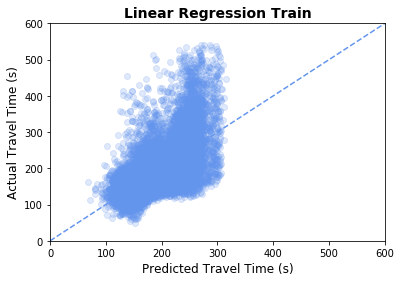

Mean Absolute Error (train): 38.74
Accuracy (train): 80.02 %
R2:  0.40019465548467215
MSE:  2789.860147188418


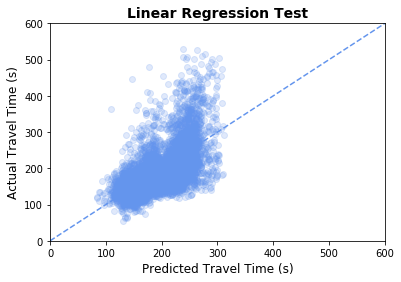

In [72]:
sc = StandardScaler()
train_features_Z = sc.fit_transform(train_features)
test_features_Z = sc.transform (test_features)

filename = '/Users/tung-linwu/Desktop/Insight/models/'+ segment +'_linear.sav' # Load Previously Saved Models
model=pickle.load(open(filename, 'rb'))

predictions_train = model.predict(train_features_Z)
predictions_test = model.predict(test_features_Z)
evaluate_model(predictions_train,train_labels,"cornflowerblue","Train")
evaluate_model(predictions_test,test_labels,"cornflowerblue","Test")

### Evaluate and Visualize Random Forest Regression Results

Mean Absolute Error (train): 10.54
Accuracy (train): 94.56 %
R2:  0.9550318795882876
MSE:  222.80732959622054


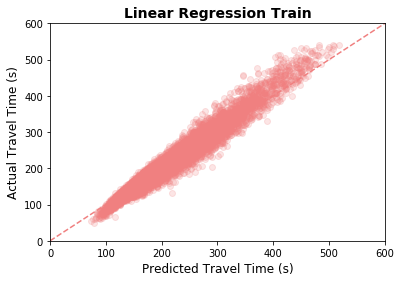

Mean Absolute Error (train): 28.61
Accuracy (train): 85.23 %
R2:  0.652345034524376
MSE:  1617.0391644915114


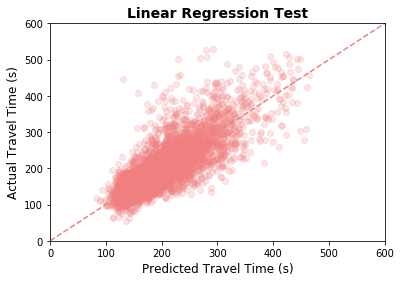

In [73]:
filename = '/Users/tung-linwu/Desktop/Insight/models/'+ segment +'.sav'
RF_model = pickle.load(open(filename, 'rb'))

predictions_train_RF = RF_model.predict(train_features)
predictions_test_RF = RF_model.predict(test_features)

evaluate_model(predictions_train_RF,train_labels,"lightcoral","Train")
evaluate_model(predictions_test_RF,test_labels,"lightcoral","Test")

In [74]:
RF_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)